In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
d=files.upload()

Saving heart.csv to heart.csv


In [4]:
df =pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.shape

(918, 12)

In [10]:
df.size

11016

In [12]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [16]:
df['ChestPainType'].value_counts()


,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [17]:
df['RestingECG'].value_counts()


,count
RestingECG,
Normal,552
LVH,188
ST,178


In [6]:
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [19]:
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

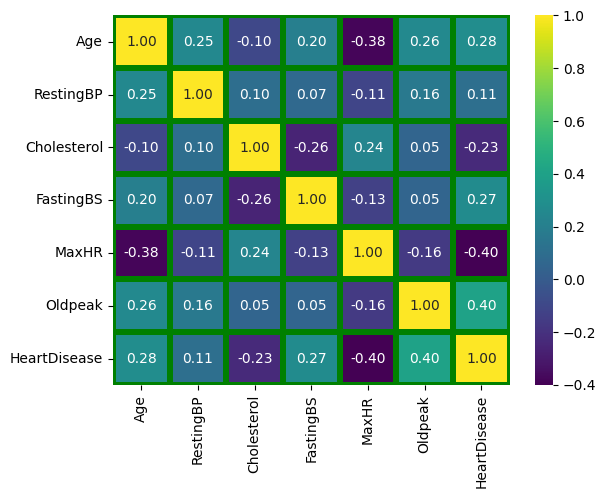

In [ ]:
sns.heatmap(data=df.corr(numeric_only=True),fmt='0.2f',annot=True,cmap='viridis',linewidth=3,linecolor='green')

In [23]:
print("\n🔹 Unique Value Counts:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



🔹 Unique Value Counts:
Age: 50 unique values
Sex: 2 unique values
ChestPainType: 4 unique values
RestingBP: 67 unique values
Cholesterol: 222 unique values
FastingBS: 2 unique values
RestingECG: 3 unique values
MaxHR: 119 unique values
ExerciseAngina: 2 unique values
Oldpeak: 53 unique values
ST_Slope: 3 unique values
HeartDisease: 2 unique values


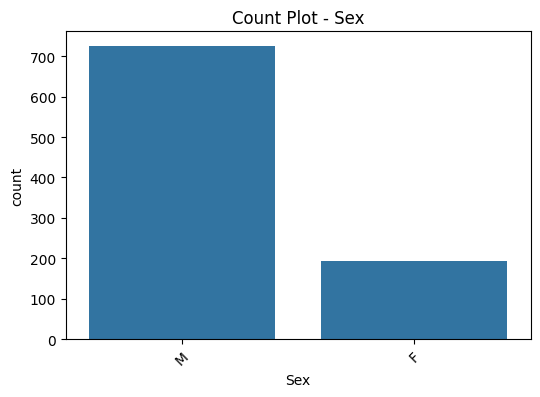

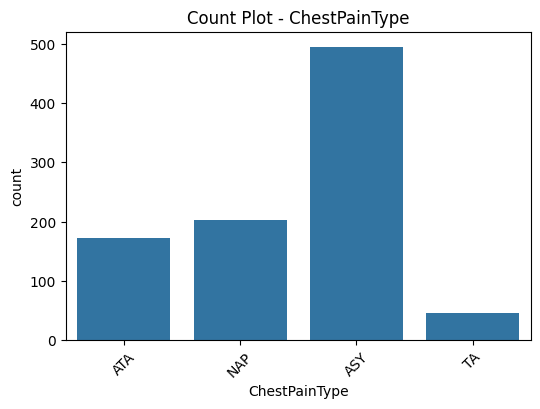

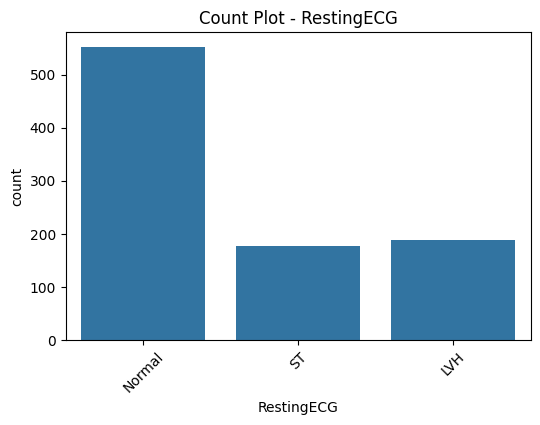

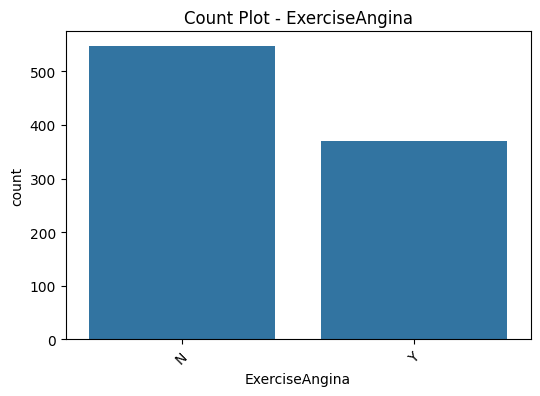

In [9]:
import matplotlib.pyplot as plt
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot - {col}')
    plt.xticks(rotation=45)
    plt.show()

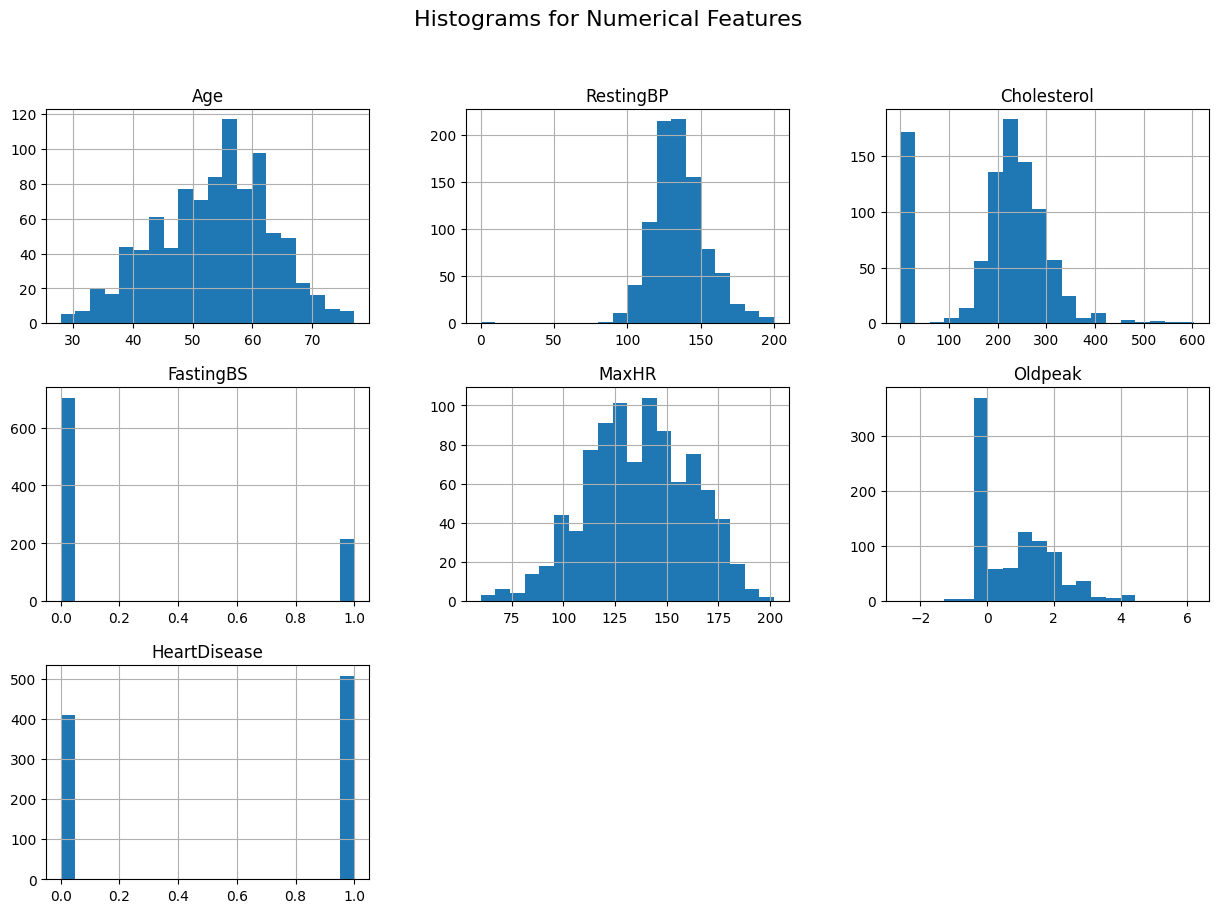

In [11]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms for Numerical Features", fontsize=16)
plt.show()


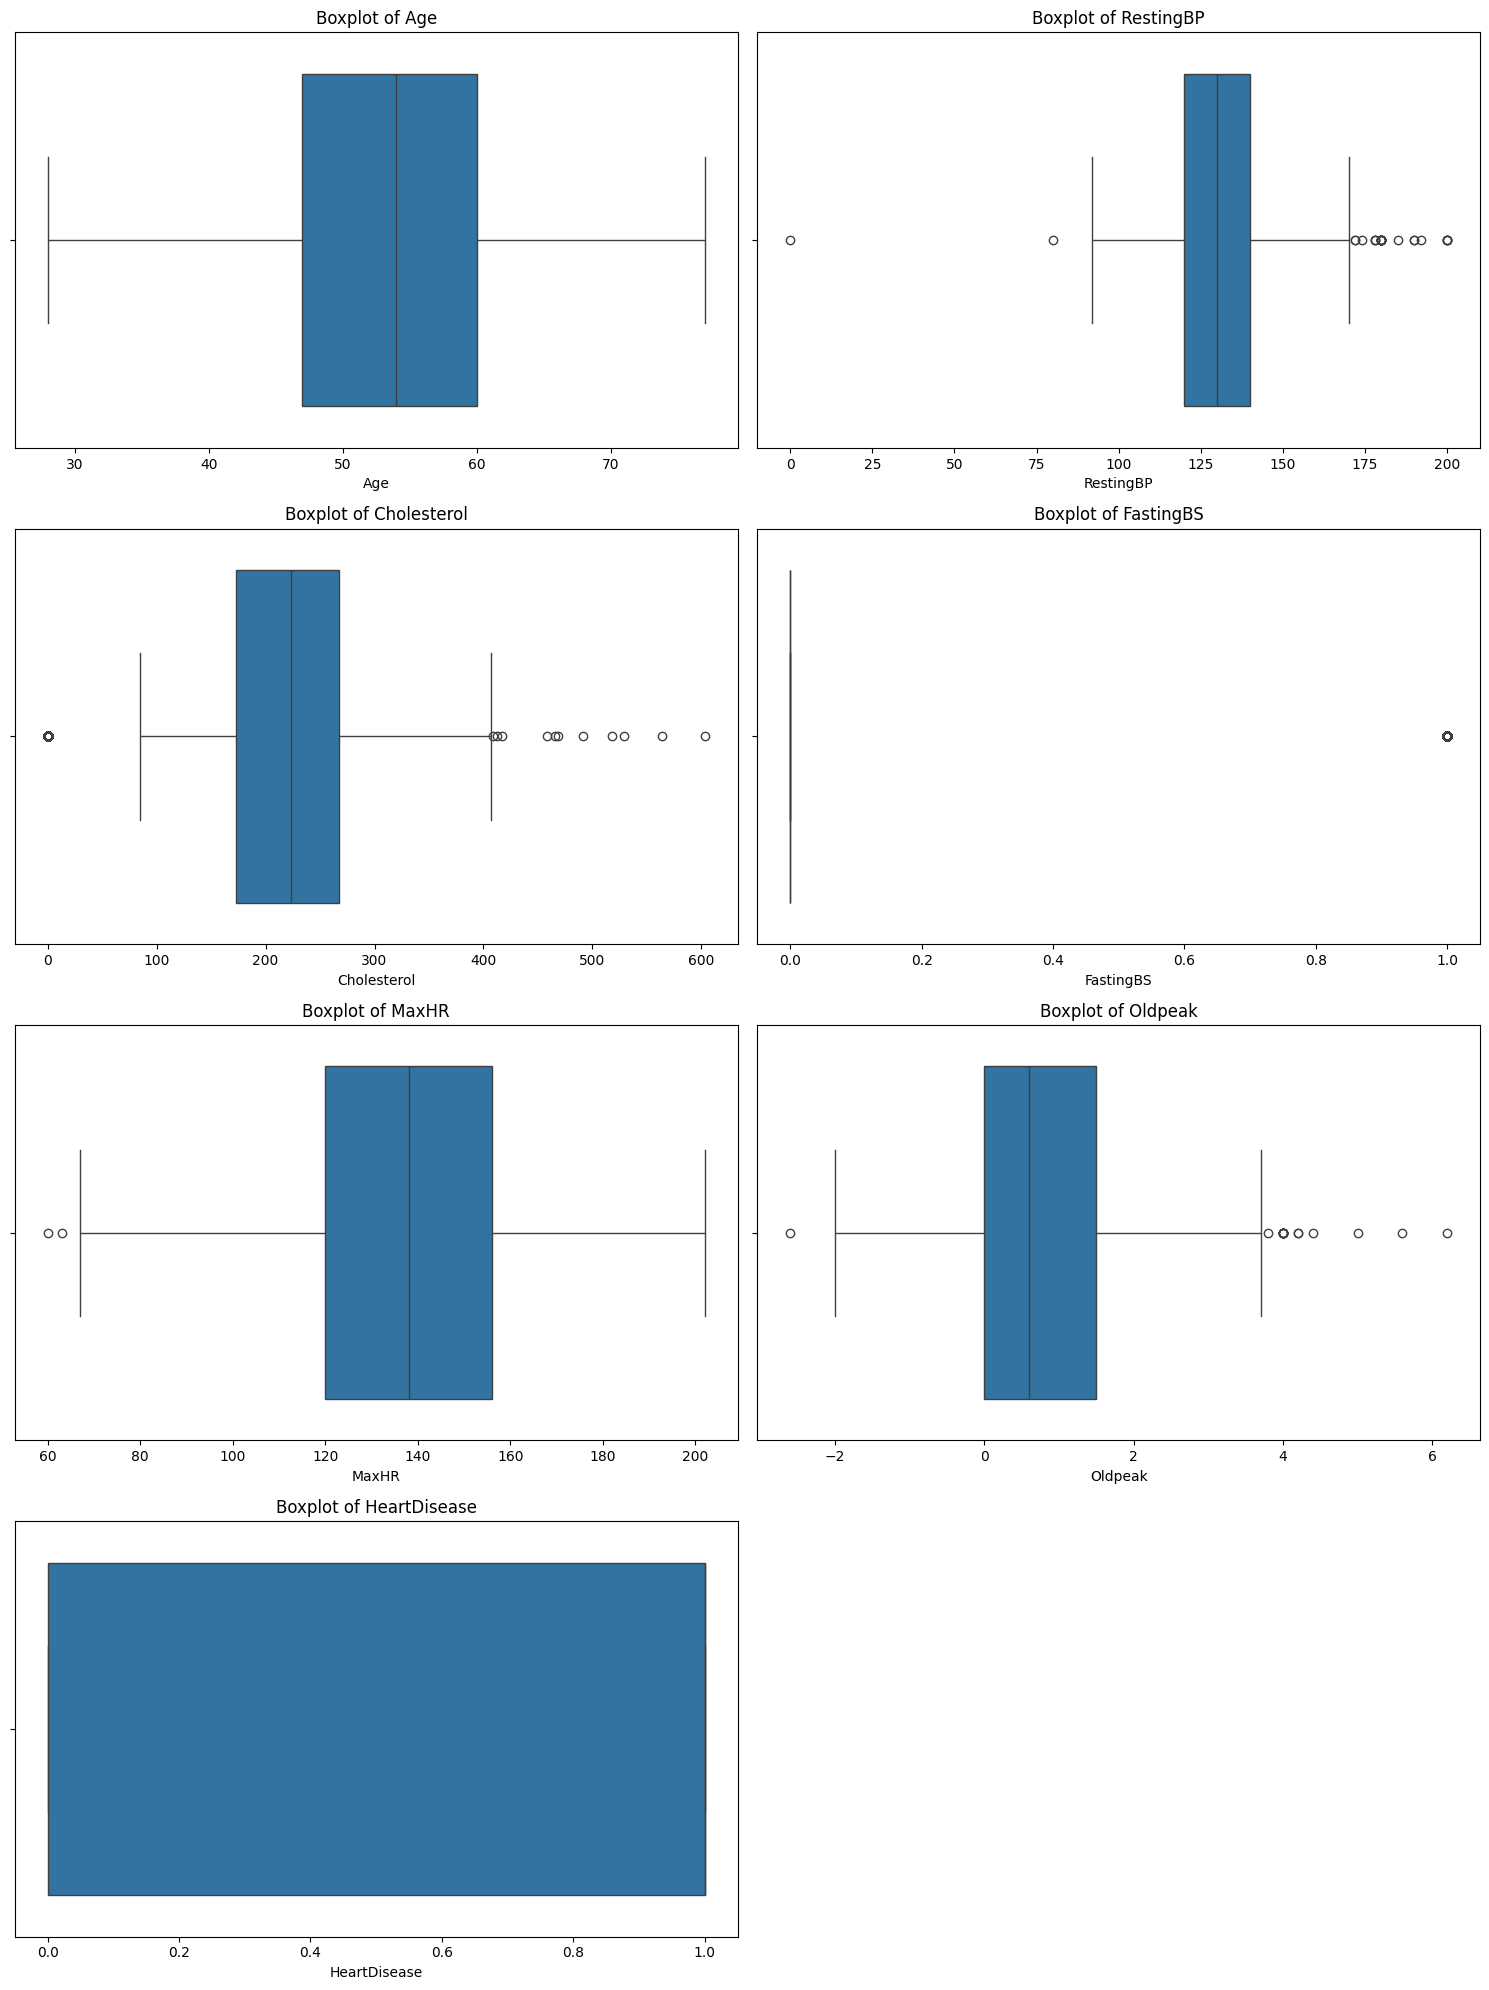

In [33]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//2 + 1, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

for col in cat_col:
  plt.figure(figsize=(6,4))
  sns.count

In [12]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

# One-hot encode multiclass categorical features
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

# Result
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


In [13]:
df.dtypes

,0
Age,int64
Sex,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64
HeartDisease,int64
ChestPainType_ATA,bool


In [14]:
df.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.055750,0.254399,-0.095282,0.198039,-0.382045,0.215793,0.258612,0.282039,-0.218165,-0.011335,0.032042,-0.230566,0.136798,0.185568,-0.258067
Sex,0.055750,1.000000,0.005133,-0.200092,0.120076,-0.189186,0.190664,0.105734,0.305445,-0.161522,-0.066486,-0.004031,-0.010634,0.063715,0.116077,-0.150942
RestingBP,0.254399,0.005133,1.000000,0.100893,0.070193,-0.112135,0.155101,0.164803,0.107589,-0.046153,-0.041348,0.049855,-0.116851,0.090447,0.099207,-0.096146
Cholesterol,-0.095282,-0.200092,0.100893,1.000000,-0.260974,0.235792,-0.034166,0.050148,-0.232741,0.150954,-0.006634,0.017365,-0.038470,-0.133106,-0.050953,0.094027
FastingBS,0.198039,0.120076,0.070193,-0.260974,1.000000,-0.131438,0.060451,0.052698,0.267291,-0.140514,-0.039249,0.026885,-0.093028,0.127110,0.107006,-0.161730
MaxHR,-0.382045,-0.189186,-0.112135,0.235792,-0.131438,1.000000,-0.370425,-0.160691,-0.400421,0.253735,0.134580,0.100025,0.023801,-0.157879,-0.342581,0.383397
ExerciseAngina,0.215793,0.190664,0.155101,-0.034166,0.060451,-0.370425,1.000000,0.408752,0.494282,-0.300365,-0.166030,-0.128105,-0.072924,0.107036,0.382237,-0.455676
Oldpeak,0.258612,0.105734,0.164803,0.050148,0.052698,-0.160691,0.408752,1.000000,0.403951,-0.262124,-0.106212,0.032231,-0.116719,0.055958,0.283295,-0.450577
HeartDisease,0.282039,0.305445,0.107589,-0.232741,0.267291,-0.400421,0.494282,0.403951,1.000000,-0.401924,-0.212964,-0.054790,-0.091580,0.102527,0.554134,-0.622164
ChestPainType_ATA,-0.218165,-0.161522,-0.046153,0.150954,-0.140514,0.253735,-0.300365,-0.262124,-0.401924,1.000000,-0.256767,-0.110679,0.107941,-0.046111,-0.304667,0.357588


<Axes: >

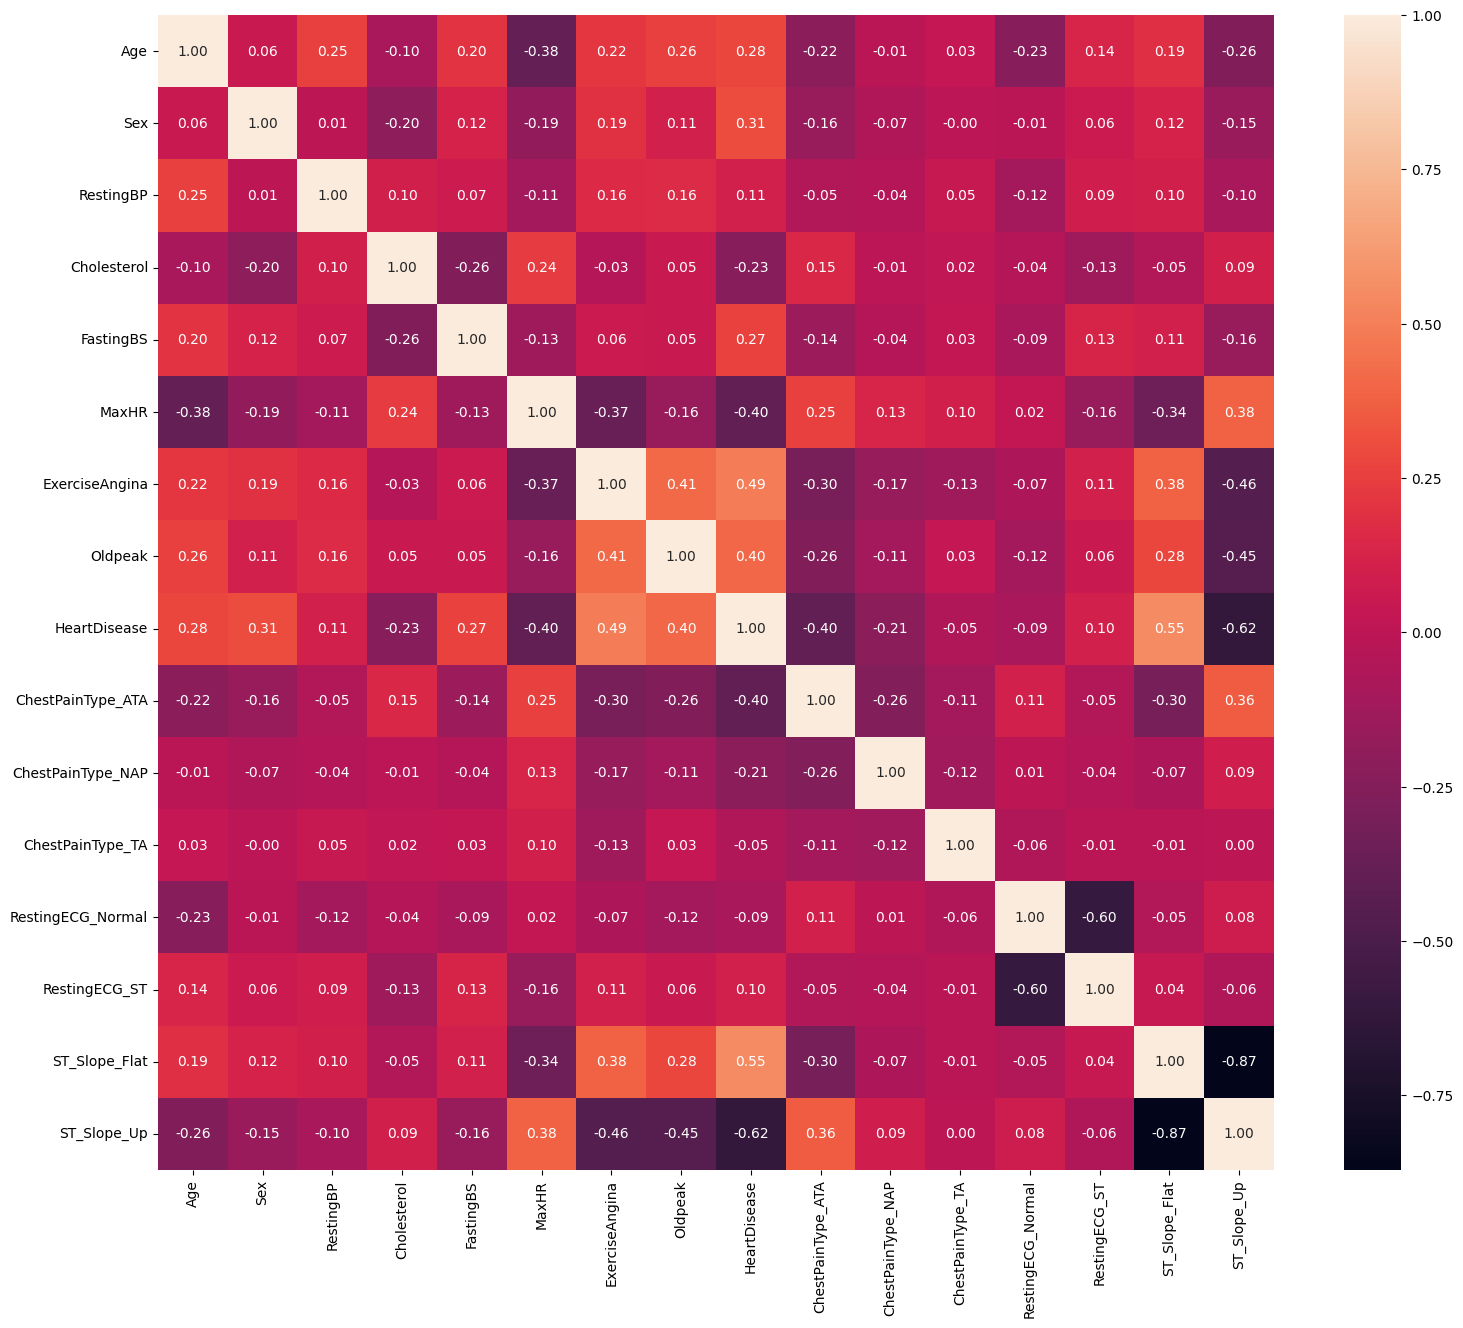

In [41]:
plt.figure(figsize=(18,15))
sns.heatmap(data=df.corr(), annot=True,fmt=".2f")

In [15]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [18]:
x = df.iloc[:, :-1]   # Features (all columns except last)
y = df.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

In [20]:
# Naive Bayes
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb=gnb.fit(xtrain,ytrain)
ypred=gnb.predict(xtest)
print('Accuracy ',accuracy_score(ytest,ypred))

Accuracy  0.9565217391304348


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc=DecisionTreeClassifier(max_depth=4,criterion='gini')
# max_depth 2,3,4 - fine tuning - adjusting parameters
dtc=dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
print('Accuracy ',accuracy_score(ytest,ypred))

Accuracy  0.9402173913043478


In [22]:
from sklearn import tree
text=tree.export_text(dtc)
print(text)

|--- feature_14 <= 0.50
|   |--- feature_7 <= 1.05
|   |   |--- feature_3 <= 437.50
|   |   |   |--- feature_7 <= 0.45
|   |   |   |   |--- class: True
|   |   |   |--- feature_7 >  0.45
|   |   |   |   |--- class: True
|   |   |--- feature_3 >  437.50
|   |   |   |--- class: False
|   |--- feature_7 >  1.05
|   |   |--- feature_5 <= 150.50
|   |   |   |--- feature_7 <= 2.45
|   |   |   |   |--- class: False
|   |   |   |--- feature_7 >  2.45
|   |   |   |   |--- class: False
|   |   |--- feature_5 >  150.50
|   |   |   |--- feature_5 <= 184.50
|   |   |   |   |--- class: True
|   |   |   |--- feature_5 >  184.50
|   |   |   |   |--- class: False
|--- feature_14 >  0.50
|   |--- class: False



In [23]:
with open('dtc_text.log','w') as fout:
  fout.write(text)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm=confusion_matrix(ytest,ypred)
print(cm)

[[100   5]
 [  6  73]]


In [26]:
from sklearn.metrics import recall_score
recall_score(ytest,ypred)

0.9240506329113924

In [27]:
from sklearn.metrics import recall_score
recall_score(ytest,ypred)

0.9240506329113924

In [29]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier model with 150 trees
ran_for_cls=RandomForestClassifier(n_estimators=150,max_features=5,random_state=101)
ran_for_cls.fit(xtrain,ytrain)
ypred=ran_for_cls.predict(xtest)
# Evaluation metrics
print(accuracy_score(ytest,ypred))

0.9347826086956522


In [30]:
# Random Forest Classifier model with 350 trees
ran_for_cls_350=RandomForestClassifier(n_estimators=350,max_features=5,random_state=101)
ran_for_cls_350.fit(xtrain,ytrain)
ypred=ran_for_cls_350.predict(xtest)
# Evaluation metrics
print(accuracy_score(ytest,ypred))

0.9456521739130435


In [31]:
# Random Forest Classifier model with 350 trees
ran_for_cls_350=RandomForestClassifier(n_estimators=350,max_features=5,random_state=101)
ran_for_cls_350.fit(xtrain,ytrain)
ypred=ran_for_cls_350.predict(xtest)
# Evaluation metrics
print(accuracy_score(ytest,ypred))

0.9456521739130435


In [33]:
# fine tuning of gradient boosting classifier
gbc=GradientBoostingClassifier(learning_rate=0.1,min_samples_split=100,min_samples_leaf=10,random_state=1)
gbc.fit(xtrain,ytrain)
ypred=gbc.predict(xtest)
print(accuracy_score(ytest,ypred))

0.9510869565217391


In [34]:
from xgboost import XGBClassifier

In [35]:
xgbc=XGBClassifier()
xgbc.fit(xtrain,ytrain)
ypred=xgbc.predict(xtest)
print(accuracy_score(ytest,ypred))

0.9565217391304348


In [36]:
xgbc1=XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=10)
xgbc1.fit(xtrain,ytrain)
ypred=xgbc1.predict(xtest)
print(accuracy_score(ytest,ypred))

0.967391304347826


In [37]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(xtrain,ytrain)
ypred=abc.predict(xtest)
print(accuracy_score(ytest,ypred))

0.9456521739130435


In [38]:
abcft=AdaBoostClassifier(n_estimators=110,learning_rate=0.09,random_state=101)
abcft.fit(xtrain,ytrain)
ypred=abcft.predict(xtest)
print(accuracy_score(ytest,ypred))

0.9347826086956522


MODEL WITH GOOD RESULTS

XGBClassifier give more accurate predictions compared to other models